# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = pd.read_csv('../data/boston_data.csv')

#check dataset
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


* CRIM: per capita crime rate by town

* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to ﬁve Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \\$10,000
* PTRATIO: pupil-teacher ratio by town 12. 
* Black: 1000(Bk−0.63)2 where Black is the proportion of blacks by town 13. 
* LSTAT: % lower 
* MEDV: Median value of owner-occupied homes in $1000s


In [3]:
#check columns data types
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [4]:
#check missing values
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
#list with all the columns names in the dataframe
col_list = boston.columns.tolist()

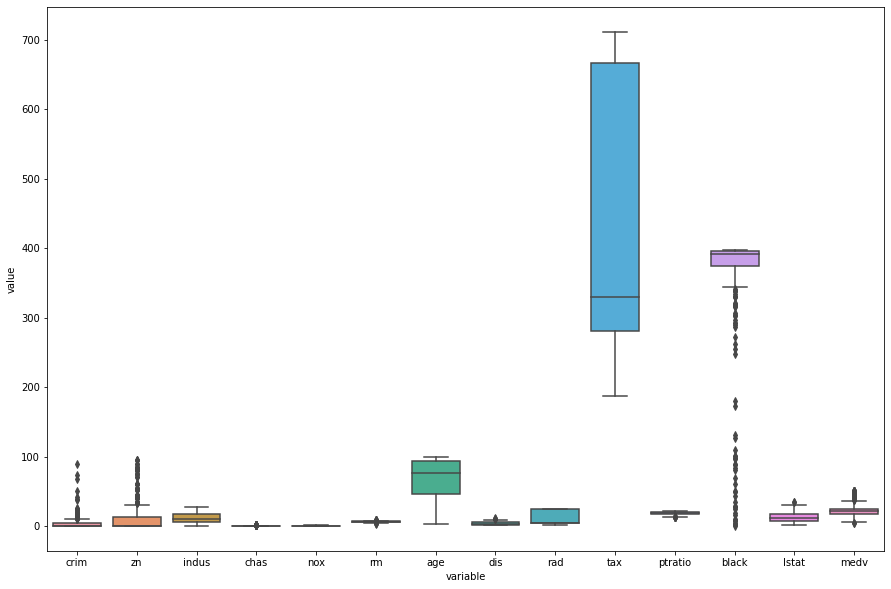

In [6]:
#Detect outliers using box plots, the points outside of the box plot are the outliers

df = pd.DataFrame(data=boston, columns=col_list)
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [7]:
# looking ath the plot above, the columns that have more outliers are the 'black' with a high number then the 'zn' and the 'crim'

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [8]:
#columns that i think are most correlated with the price are: 'crim','rm','age','chas','tax'
col_more_corr = ['crim','rm','age','tax','medv']
boston[col_more_corr].corr()



,crim,rm,age,tax,medv
crim,1.000000,-0.172226,0.349288,0.565047,-0.400956
rm,-0.172226,1.000000,-0.210589,-0.241733,0.683541
age,0.349288,-0.210589,1.000000,0.503830,-0.390863
tax,0.565047,-0.241733,0.503830,1.000000,-0.495792
medv,-0.400956,0.683541,-0.390863,-0.495792,1.000000


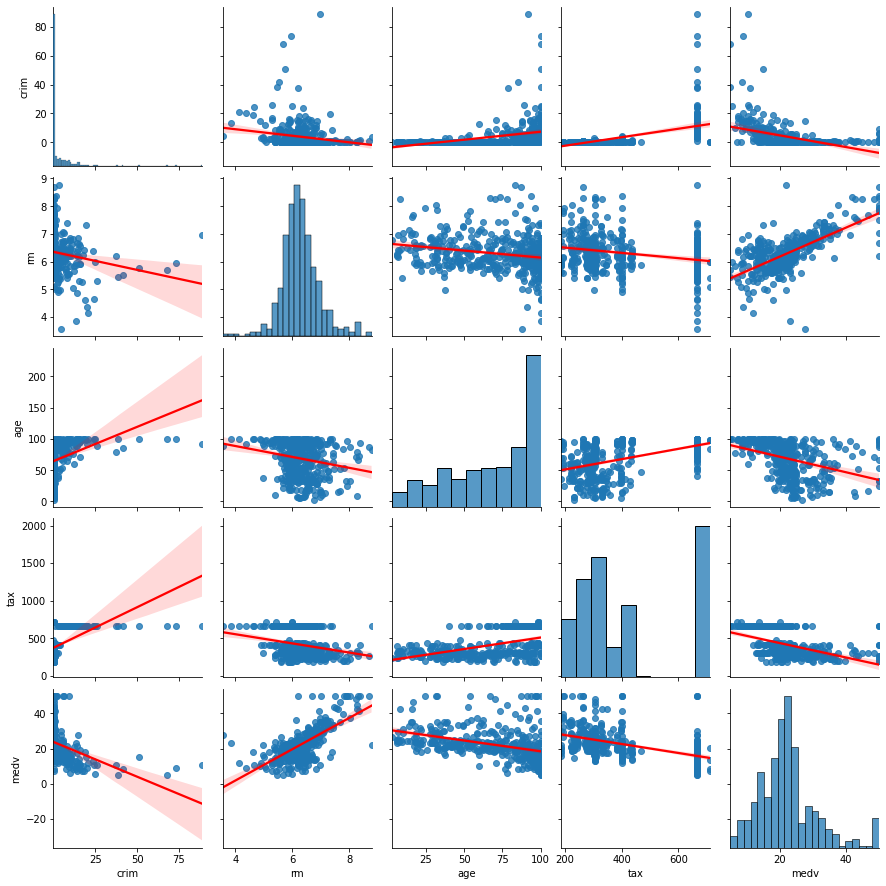

In [9]:
# Your plots here

#show the data dispersion as well as the regression line of best fit
sns.pairplot(boston[col_more_corr],kind="reg", plot_kws={'line_kws':{'color':'red'}})

#display plot
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [10]:
# Your response here
#crim column: with the increase of the crime should lead to a decrease in the house price but the correlation is low not expected
##rm column: with the increase in the number of rooms the house value increases,based on the plots it verifies that
#age column : with the increase of the age the value of the house decreases, that lowers the price it was expected
#tax colum : i would expect a higher correlation between the taxes and the house value but this two variables have low correlation


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [11]:
col_list

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

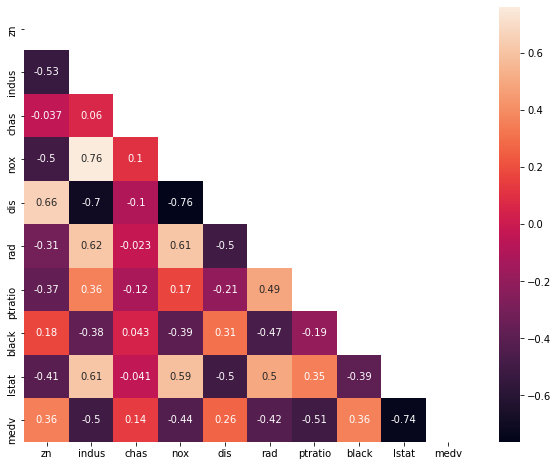

In [12]:
# Your response here
#list with the remaining columns
remaining_var = ['zn','indus','chas','nox','dis','rad','ptratio','black','lstat','medv']

#creates a correlation matrix 
corr_matrix = boston[remaining_var].corr()

# creating mask
mask = np.triu(np.ones_like(corr_matrix))

#defining the size/dimensions of the plot
plt.figure(figsize=(10,8))

# plotting a triangle correlation heatmap
sns.heatmap(corr_matrix,annot=True,mask=mask)

#displays the plot
plt.show()

In [13]:
#The variables zn (proportion of residential land zoned for lots over 25,000 sq.ft.), black (1000(Bk−0.63)2 where Black is the proportion of blacks by town 13)
# and dis(weighted distances to ﬁve Boston employment centers) have a considerable positive correlation.
#the other variables are negatively correlated the lstat have a high negative correlation with the price

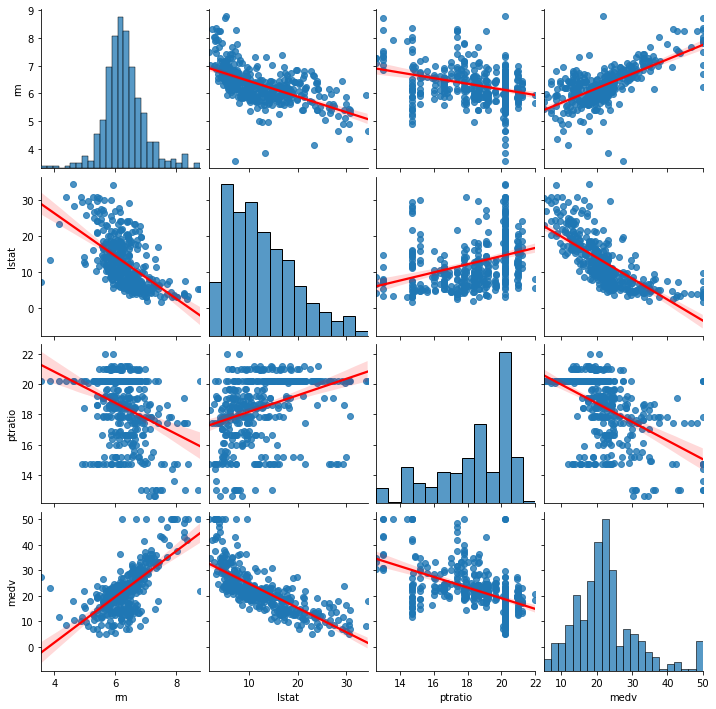

In [14]:
#ploting the most correlated columns
most_col_corr= ['rm','lstat','ptratio','medv']

#show the data dispersion as well as the regression line of best fit
sns.pairplot(boston[most_col_corr],kind="reg", plot_kws={'line_kws':{'color':'red'}})

#display plot
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [15]:
# Your code here
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [16]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    r2_score(y_pred,y_true)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [17]:
# Your code here
from sklearn.model_selection import train_test_split

#Spliting the target and the features
X = boston.drop('medv',axis =1)
y = boston['medv']

X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, shuffle = True )

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [18]:
from sklearn.ensemble import RandomForestRegressor

max_depth = [2,3,4,6,8,10]

train_scores = []
test_scores = []

for i in max_depth:
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr_model = regr.fit(X, y)
    y_pred = regr_model.predict(X_test)
    train_scores.append(regr_model.score(X_train,y_train))
    test_scores.append(regr_model.score(X_test,y_test))

for x, y, z in zip(max_depth, train_scores, test_scores):
    print('gama:',x,'train score',y, 'test score',z)

gama: 2 train score 0.786463162826355 test score 0.656405231809003
gama: 3 train score 0.8777849933509878 test score 0.7367803693380492
gama: 4 train score 0.9187653382216443 test score 0.8022969541496727
gama: 6 train score 0.9536783788677876 test score 0.9044654196226072
gama: 8 train score 0.9688083715818674 test score 0.9424806070069992
gama: 10 train score 0.9744801288504438 test score 0.9538602845947547


Now, plot the score for each tree on the training set and on the testing set.

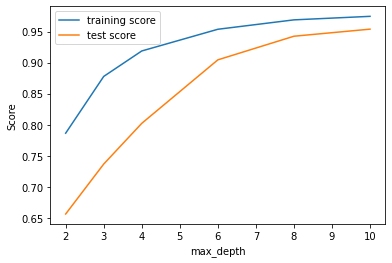

In [19]:
# Produce a plot with the score for the testing and training for the different max depths
max_depth = [2,3,4,6,8,10]

plt.plot(max_depth, train_scores, label="training score")
plt.plot(max_depth, test_scores, label="test score")
plt.ylabel("Score")
plt.xlabel("max_depth")
plt.legend()

plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [20]:
# Your response here
#With the increase in the depth there is an increase in the performance of the model

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [21]:
# Your response here
#When the model is trained with a maximum depth of 1 the model suffer from high bias and low variannce, for maximum depth of 10
#the model suffer from low bias and low variannce.

#When maximum depth increases a lot it will overfitt, that means high variance and low bias when maximum depth is to low the
#model tends to underfitt, that means low variance but high bias.



### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [43]:


#Spliting the target and the features
X = boston.drop('medv',axis =1)
y = boston['medv']


X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 7, shuffle = True )

max_depth2 = []
for num in range(6,20):
    max_depth2.append(num)
    
train_scores2 = []
test_scores2 = []

for depth2 in max_depth2:
    regr2 = RandomForestRegressor(max_depth=depth2,  random_state=0)
    regr_model2 = regr2.fit(X, y)
    train_scores2.append(regr_model2.score(X_train,y_train))
    test_scores2.append(regr_model2.score(X_test,y_test))

for a, b, c in zip(max_depth2, train_scores2, test_scores2):
    print('gama:',a,'train score',b, 'test score',c)

gama: 6 train score 0.9477822383643407 test score 0.9486089367147306
gama: 7 train score 0.958426587233353 test score 0.9614071999348172
gama: 8 train score 0.9647747889545525 test score 0.9700654773961829
gama: 9 train score 0.9686095848725315 test score 0.9744216261388576
gama: 10 train score 0.9710035249730725 test score 0.9768633125711689
gama: 11 train score 0.9719034507308503 test score 0.979425739669499
gama: 12 train score 0.9729800116463561 test score 0.9804976534365631
gama: 13 train score 0.9731566380718457 test score 0.9800467297094179
gama: 14 train score 0.9731728166657957 test score 0.9803659845078232
gama: 15 train score 0.9730810033680048 test score 0.9809540436313676
gama: 16 train score 0.9721303705365564 test score 0.9811621910073071
gama: 17 train score 0.9726814979749873 test score 0.9808350855988268
gama: 18 train score 0.9725832659152139 test score 0.9809988843706865
gama: 19 train score 0.972550627683863 test score 0.980601918979119


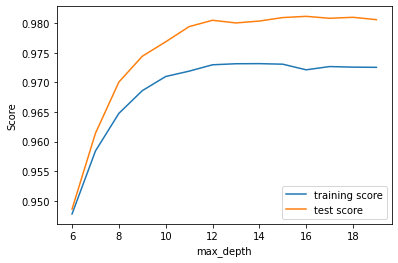

In [44]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(max_depth2, train_scores2, label="training score")
plt.plot(max_depth2, test_scores2, label="test score")
plt.ylabel("Score")
plt.xlabel("max_depth")
plt.legend()

plt.show()

In [24]:
# Your response here
#the max_depth parameter that would optimize the model is max_depth = 6, because it gets the best score without overfiting
# the score of the training and test are close

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [25]:
# Your response here
#data that was collected from 1978 is only relevant if it is attached to more recent data to do a time line to see the progression
# and see if there is a tendency in a time series in term of the house values.
#But using only data from 1978 to predict todays reality, it is not relevant

#It could be added more features like number of bathrooms, but it is more important quality then quantity

#The modul is robust to make consistent predictions for 1978, the model have a good score.

#For a rural city should be used another model, the variables affecting the value would be different